### Test easyCOR

In [3]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 21.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylin

In [4]:
!pip install opencv-python

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import difflib
import os
import glob

# Lire la liste des fromages depuis un fichier
with open('/content/drive/MyDrive/modal/only_text/list_of_cheese.txt', 'r', encoding='utf-8') as fichier:
    list_of_cheese = [ligne.strip().lower().replace(" ", "_") for ligne in fichier]

# Initialiser le lecteur EasyOCR
reader = easyocr.Reader(['fr'])

# Effectuer l'OCR sur l'image

def lecture_image(img):#lis l'image et renvoie la liste de mots lus
    liste_mots_image = []
    results = reader.readtext(img)
    for res in results:
        det, conf = res[1], res[2]
        liste_mots_image.append(det.lower().replace(" ", "_"))  # Convertir en minuscules pour une comparaison plus facile
    return liste_mots_image

def find_closest_match(word, word_list):
    closest_match = difflib.get_close_matches(word, word_list, n=1, cutoff=0)
    if closest_match:
        match = closest_match[0]
        score = difflib.SequenceMatcher(None, word, match).ratio()
        return match, score
    else:
        return None, 0.0

def find_closest_cheese(list_of_cheese, img):
    closest_matches = []
    lecture = lecture_image(img)
    for cheese in list_of_cheese:
        match, score = find_closest_match(cheese, lecture)
        if match:
            closest_matches.append((cheese, match, score))
            best_match = max(closest_matches, key=lambda x: x[2])
        else:
          best_match = None
    return best_match
"""
closest_cheeses = find_closest_cheese(list_of_cheese)
print("closest:", closest_cheeses)
#for cheese, match, score in closest_cheeses:
    #print(f"Fromage: {cheese}, Correspondance trouvée: {match}, Score: {score:.2f}")

# Trouver et afficher le meilleur score
if closest_cheeses:
    best_match = max(closest_cheeses, key=lambda x: x[2])
    print(best_match)
    print(f"Meilleure correspondance: Fromage: {best_match[0]}, Correspondance trouvée: {best_match[1]}, Score: {best_match[2]:.2f}")
else:
    print("Aucune correspondance trouvée.")
"""

fichier = '/content/drive/MyDrive/modal/only_text/val_with_text/BEAUFORT/000009.jpg'
print(fichier, find_closest_cheese(list_of_cheese, cv2.imread(fichier)))

/content/drive/MyDrive/modal/only_text/val_with_text/BEAUFORT/000009.jpg ('morbier', 'svoie', 0.5)


In [ ]:
print(list_of_cheese)

['beaufort', 'brie_de_melun', 'bûchette_de_chèvre', 'cabecou', 'camembert', 'chabichou', 'cheddar', 'chèvre', 'comté', 'emmental', 'epoisses', 'feta', 'fourme_d’ambert', 'fromage_frais', 'gruyère', 'maroilles', 'mimolette', 'mont_d’or', 'morbier', 'mothais', 'mozzarella', 'munster', 'neufchatel', 'ossau-_iraty', 'parmesan', 'pecorino', 'pouligny_saint-_pierre', 'raclette', 'reblochon', 'roquefort', 'saint-_félicien', 'saint-nectaire', 'scarmoza', 'stilton', 'tomme_de_vache', 'tête_de_moines', 'vacherin']


In [ ]:
with open('/content/drive/MyDrive/modal/only_text/resultats_easyOCR_2.txt', 'w') as fichier_resultats:# Traverse through all directories and subdirectories
  dossier_principal = '/content/drive/MyDrive/modal/only_text/val_with_text'


  compteur = 0
  for root, dirs, files in os.walk(dossier_principal):
      # Initialize a list to collect image paths and captions
      current_folder_name = os.path.basename(root).lower().replace(" ", "_")
      print(current_folder_name)
      # Find all .jpg files in the current directory
      for file in files:
          compteur += 1
          image_path = os.path.join(root, file)
          closest_cheese = find_closest_cheese(list_of_cheese, image_path)
          if closest_cheese != None:
            fichier_resultats.write(current_folder_name +" "+closest_cheese[0]+" "+str(closest_cheese[2]) +"\n")

val_with_text
mothais
feta


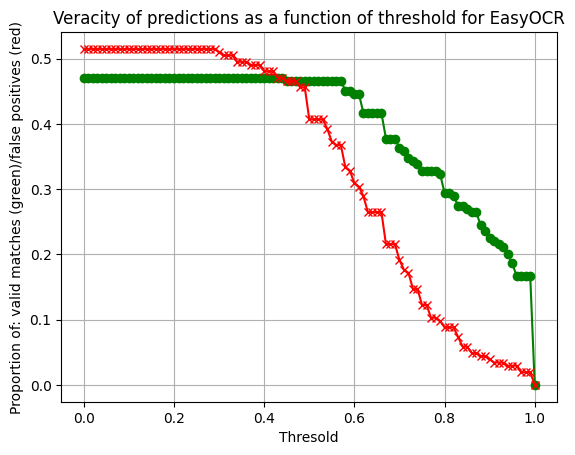

In [27]:
#Lire le fichier et extraire les données
def lire_fichier(fichier):
    lignes = []
    with open(fichier, 'r', encoding='utf-8') as f:
        for ligne in f:
            fromages_score = ligne.strip().split()
            if len(fromages_score) == 3:
                fromage1, fromage2, score = fromages_score
                score = float(score)
                lignes.append((fromage1, fromage2, score))
    return lignes

#Calculer les correspondances valides pour chaque seuil
def calculer_correspondances(lignes):
    seuils = [i * 0.01 for i in range(101)]
    correspondances = []
    correspondances_fausses = []
    out = []

    for seuil in seuils:
        nb_correspondances = sum(1 for fromage1, fromage2, score in lignes if fromage1 == fromage2 and score > seuil)
        nb_correspondances_fausses = sum(1 for fromage1, fromage2, score in lignes if fromage1 != fromage2 and score > seuil)
        #nb_out = sum(1 for fromage1, fromage2, score in lignes if score <= seuil)
        correspondances.append(nb_correspondances /204)
        correspondances_fausses.append(nb_correspondances_fausses/204)
        #out.append(nb_out/204)

    return seuils, correspondances, correspondances_fausses

# Étape 3 : Tracer la courbe
def tracer_courbe(seuils, correspondances, correspondances_fausses):
    plt.plot(seuils, correspondances, marker='o', color='green')
    plt.plot(seuils, correspondances_fausses, marker='x', color="red")
    #plt.plot(seuils, out, marker='_', color="blue")
    plt.xlabel('Thresold')
    plt.ylabel('Proportion of: valid matches (green)/false positives (red)')
    plt.title('Veracity of predictions as a function of threshold for EasyOCR')
    plt.grid(True)
    plt.show()

# Chemin du fichier
fichier = '/content/drive/MyDrive/modal/only_text/resultats_easyOCR.txt'

# Lire le fichier et extraire les données
lignes = lire_fichier(fichier)

# Calculer les correspondances valides pour chaque seuil
seuils, correspondances, correspondances_fausses = calculer_correspondances(lignes)

# Tracer la courbe
tracer_courbe(seuils, correspondances, correspondances_fausses)

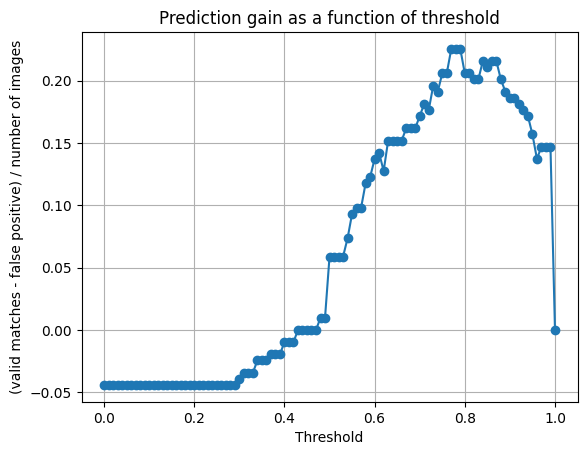

In [ ]:
import matplotlib.pyplot as plt

# Étape 1 : Lire le fichier et extraire les données
def lire_fichier(fichier):
    lignes = []
    with open('/content/drive/MyDrive/modal/only_text/resultats_easyOCR.txt', 'r', encoding='utf-8') as f:
        for ligne in f:
            fromages_score = ligne.strip().split()
            if len(fromages_score) == 3:
                fromage1, fromage2, score = fromages_score
                score = float(score)
                lignes.append((fromage1, fromage2, score))
    return lignes

# Étape 2 : Calculer les correspondances valides et fausses pour chaque seuil
def calculer_ratios(lignes):
    seuils = [i * 0.01 for i in range(101)]
    ratios = []

    for seuil in seuils:
        nb_valides = sum(1 for fromage1, fromage2, score in lignes if fromage1 == fromage2 and score > seuil)
        nb_fausses = sum(1 for fromage1, fromage2, score in lignes if fromage1 != fromage2 and score > seuil)
        nb_out = sum(1 for fromage1, fromage2, score in lignes if score <= seuil)

        if nb_fausses == 0:
            ratio = float('inf') if nb_valides > 0 else 0  # Évite la division par zéro
        else:
            ratio = (nb_valides -nb_fausses) / 204 #204 car 204 images de fromages dans le jeu de données

        ratios.append(ratio)

    return seuils, ratios

# Étape 3 : Tracer la courbe
def tracer_courbe(seuils, ratios):
    plt.plot(seuils, ratios, marker='o')
    plt.xlabel('Threshold')
    plt.ylabel('(valid matches - false positive) / number of images')
    plt.title('Prediction gain as a function of threshold')
    plt.grid(True)
    plt.show()

# Chemin du fichier
fichier = '/content/drive/MyDrive/modal/only_text/resultats.txt'

# Lire le fichier et extraire les données
lignes = lire_fichier(fichier)

# Calculer les ratios valides/fausses pour chaque seuil
seuils, ratios = calculer_ratios(lignes)

# Tracer la courbe
tracer_courbe(seuils, ratios)

### Test Tesseract

In [ ]:
!pip install pytesseract

In [ ]:
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (20.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [ ]:
!sudo mv /content/drive/MyDrive/modal/fra.traineddata /usr/share/tesseract-ocr/4.00/tessdata/

In [ ]:
!ls /usr/share/tesseract-ocr/4.00/tessdata/


configs  eng.traineddata  fra.traineddata  osd.traineddata  pdf.ttf  tessconfigs


In [6]:
import cv2
import pytesseract
from pytesseract import Output
import difflib
import os

# Lire la liste des fromages depuis un fichier
with open('/content/drive/MyDrive/modal/only_text/list_of_cheese.txt', 'r', encoding='utf-8') as fichier:
    list_of_cheese = [ligne.strip().lower() for ligne in fichier]

# Définir le chemin de l'exécutable de Tesseract si nécessaire (décommentez la ligne suivante si vous avez besoin de spécifier le chemin)
# pytesseract.pytesseract.tesseract_cmd = r'path_to_your_tesseract_executable'

def lecture_image(img):
    # Utiliser pytesseract pour lire l'image
    custom_config = r'--oem 3 --psm 6'  # Config Tesseract
    results = pytesseract.image_to_data(img, config=custom_config, lang='fra')
    print(results)

    liste_mots_image = [word.lower() for word in results['text'] if word.strip() != '']
    print(liste_mots_image)
    return liste_mots_image
"""
def find_closest_match(word, word_list):
    closest_match = difflib.get_close_matches(word, word_list, n=1, cutoff=0)
    if closest_match:
        match = closest_match[0]
        score = difflib.SequenceMatcher(None, word, match).ratio()
        return match, score
    else:
        return None, 0.0

def find_closest_cheese(list_of_cheese, img):
    closest_matches = []
    for cheese in list_of_cheese:
        match, score = find_closest_match(cheese, lecture_image(img))
        if match:
            closest_matches.append((cheese, match, score))

    if closest_matches:
        best_match = max(closest_matches, key=lambda x: x[2])
    else:
        best_match = None
    return best_match
"""
# Exemple d'utilisation
fichier = '/content/drive/MyDrive/modal/only_text/val_with_text/PECORINO/000007.jpg'
img_cv = cv2.imread(fichier)
img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
print(fichier, find_closest_cheese(list_of_cheese, img_rgb))

ModuleNotFoundError: No module named 'pytesseract'

### Test Keras

In [7]:
!pip install keras-ocr

In [8]:
import keras_ocr
import cv2

# Lire la liste des fromages depuis un fichier
with open('/content/drive/MyDrive/modal/only_text/list_of_cheese.txt', 'r', encoding='utf-8') as fichier:
    list_of_cheese = [ligne.strip().lower().replace(" ", "_") for ligne in fichier]


# Charger l'image
image_path = '/content/drive/MyDrive/modal/only_text/val_with_text/BEAUFORT/000009.jpg'


# Initialiser le pipeline Keras OCR
pipeline = keras_ocr.pipeline.Pipeline()

def find_closest_match(word, word_list):
    closest_match = difflib.get_close_matches(word, word_list, n=1, cutoff=0)
    if closest_match:
        match = closest_match[0]
        score = difflib.SequenceMatcher(None, word, match).ratio()
        return match, score
    else:
        return None, 0.0

def lecture_image(image_path):
  liste_mots_image = []
  # Charger l'image en utilisant Keras OCR
  images = [keras_ocr.tools.read(image_path)]

  # Effectuer la reconnaissance de texte
  prediction_groups = pipeline.recognize(images)

  # Afficher les résultats
  for box, text in prediction_groups[0]:
      liste_mots_image.append(box.lower().replace(" ", "_"))
  return liste_mots_image

def find_closest_cheese(list_of_cheese, img):
    closest_matches = []
    lecture = lecture_image(img)
    for cheese in list_of_cheese:
        match, score = find_closest_match(cheese, lecture)
        if match:
            closest_matches.append((cheese, match, score))
            best_match = max(closest_matches, key=lambda x: x[2])
        else:
          best_match = None
    return best_match

Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
find_closest_cheese(list_of_cheese, image_path)

1/1 [==============================] - 2s 2s/step


('maroilles', 'savoie', 0.5333333333333333)

In [14]:
import os
import difflib
with open('/content/drive/MyDrive/modal/only_text/resultats_keras.txt', 'w') as fichier_resultats:# Traverse through all directories and subdirectories
  dossier_principal = '/content/drive/MyDrive/modal/only_text/val_with_text'


  compteur = 0
  for root, dirs, files in os.walk(dossier_principal):
      # Initialize a list to collect image paths and captions
      current_folder_name = os.path.basename(root).lower().replace(" ", "_")
      print(current_folder_name)
      # Find all .jpg files in the current directory
      for file in files:
          compteur += 1
          image_path = os.path.join(root, file)
          closest_cheese = find_closest_cheese(list_of_cheese, image_path)
          if closest_cheese != None:
            fichier_resultats.write(current_folder_name +" "+closest_cheese[0]+" "+str(closest_cheese[2]) +"\n")

val_with_text
mothais
1/1 [==============================] - 0s 56ms/step
feta
1/1 [==============================] - 3s 3s/step
neufchatel
1/1 [==============================] - 4s 4s/step
beaufort
1/1 [==============================] - 0s 81ms/step
chabichou
1/1 [==============================] - 0s 56ms/step
mont_d’or
1/1 [==============================] - 0s 94ms/step
munster
1/1 [==============================] - 0s 36ms/step
epoisses
1/1 [==============================] - 0s 54ms/step
vacherin
7/7 [==============================] - 0s 59ms/step
cheddar
2/2 [==============================] - 0s 33ms/step
pecorino
1/1 [==============================] - 0s 61ms/step
morbier
1/1 [==============================] - 0s 53ms/step
scarmoza
1/1 [==============================] - 0s 60ms/step
chèvre
1/1 [==============================] - 0s 43ms/step
fromage_frais
1/1 [==============================] - 0s 45ms/step
saint-nectaire
1/1 [==============================] - 0s 32ms/step
mozzarel

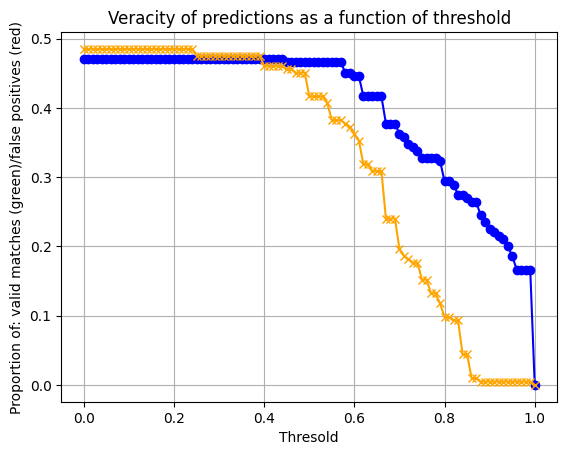

In [19]:
import matplotlib.pyplot as plt

#Lire le fichier et extraire les données
def lire_fichier(fichier):
    lignes = []
    with open(fichier, 'r', encoding='utf-8') as f:
        for ligne in f:
            fromages_score = ligne.strip().split()
            if len(fromages_score) == 3:
                fromage1, fromage2, score = fromages_score
                score = float(score)
                lignes.append((fromage1, fromage2, score))
    return lignes

#Calculer les correspondances valides pour chaque seuil
def calculer_correspondances(lignes_easy, lignes_keras):
    seuils = [i * 0.01 for i in range(101)]
    correspondances_easy = []
    correspondances_keras = []
    out = []

    for seuil in seuils:
        nb_correspondances_easy = sum(1 for fromage1, fromage2, score in lignes_easy if fromage1 == fromage2 and score > seuil)
        nb_correspondances_keras= sum(1 for fromage1, fromage2, score in lignes_keras if fromage1 != fromage2 and score > seuil)
        #nb_out = sum(1 for fromage1, fromage2, score in lignes if score <= seuil)
        correspondances_easy.append(nb_correspondances_easy /204)
        correspondances_keras.append(nb_correspondances_keras/204)
        #out.append(nb_out/204)

    return seuils, correspondances_easy, correspondances_keras

# Étape 3 : Tracer la courbe
def tracer_courbe(seuils, correspondances, correspondances_fausses):
    plt.plot(seuils, correspondances, marker='o', color='blue')
    plt.plot(seuils, correspondances_fausses, marker='x', color="orange")
    #plt.plot(seuils, out, marker='_', color="blue")
    plt.xlabel('Thresold')
    plt.ylabel('Proportion of: valid matches for easyOCR (blue) and keras (orange)')
    plt.title('Veracity of predictions as a function of threshold')
    plt.grid(True)
    plt.show()

# Chemin du fichier
fichier1 = '/content/drive/MyDrive/modal/only_text/resultats_easyOCR.txt'
fichier2 = '/content/drive/MyDrive/modal/only_text/resultats_keras.txt'

# Lire le fichier et extraire les données
lignes1 = lire_fichier(fichier1)
lignes2 = lire_fichier(fichier2)
# Calculer les correspondances valides pour chaque seuil
seuils, correspondances, correspondances_fausses = calculer_correspondances(lignes1, lignes2)

# Tracer la courbe
tracer_courbe(seuils, correspondances, correspondances_fausses)

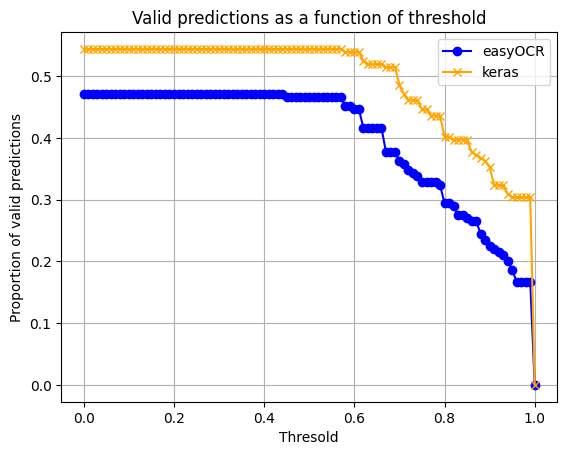

In [25]:
import matplotlib.pyplot as plt

#Lire le fichier et extraire les données
def lire_fichier(fichier):
    lignes = []
    with open(fichier, 'r', encoding='utf-8') as f:
        for ligne in f:
            fromages_score = ligne.strip().split()
            if len(fromages_score) == 3:
                fromage1, fromage2, score = fromages_score
                score = float(score)
                lignes.append((fromage1, fromage2, score))
    return lignes

#Calculer les correspondances valides pour chaque seuil
def calculer_correspondances(lignes_easy, lignes_keras):
    seuils = [i * 0.01 for i in range(101)]
    correspondances_easy = []
    correspondances_keras = []
    out = []

    for seuil in seuils:
        nb_correspondances_easy = sum(1 for fromage1, fromage2, score in lignes_easy if fromage1 == fromage2 and score > seuil)
        nb_correspondances_keras= sum(1 for fromage1, fromage2, score in lignes_keras if fromage1 == fromage2 and score > seuil)
        #nb_out = sum(1 for fromage1, fromage2, score in lignes if score <= seuil)
        correspondances_easy.append(nb_correspondances_easy /204)
        correspondances_keras.append(nb_correspondances_keras/204)
        #out.append(nb_out/204)

    return seuils, correspondances_easy, correspondances_keras

# Étape 3 : Tracer la courbe
def tracer_courbe(seuils, correspondances, correspondances_fausses):
    plt.plot(seuils, correspondances, marker='o', color='blue', label='easyOCR')
    plt.plot(seuils, correspondances_fausses, marker='x', color="orange", label="keras")
    #plt.plot(seuils, out, marker='_', color="blue")
    plt.xlabel('Thresold')
    plt.ylabel('Proportion of valid predictions')
    plt.title('Valid predictions as a function of threshold')
    plt.legend()
    plt.grid(True)
    plt.show()

# Chemin du fichier
fichier1 = '/content/drive/MyDrive/modal/only_text/resultats_easyOCR.txt'
fichier2 = '/content/drive/MyDrive/modal/only_text/resultats_keras.txt'

# Lire le fichier et extraire les données
lignes1 = lire_fichier(fichier1)
lignes2 = lire_fichier(fichier2)
# Calculer les correspondances valides pour chaque seuil
seuils, correspondances, correspondances_fausses = calculer_correspondances(lignes1, lignes2)

# Tracer la courbe
tracer_courbe(seuils, correspondances, correspondances_fausses)

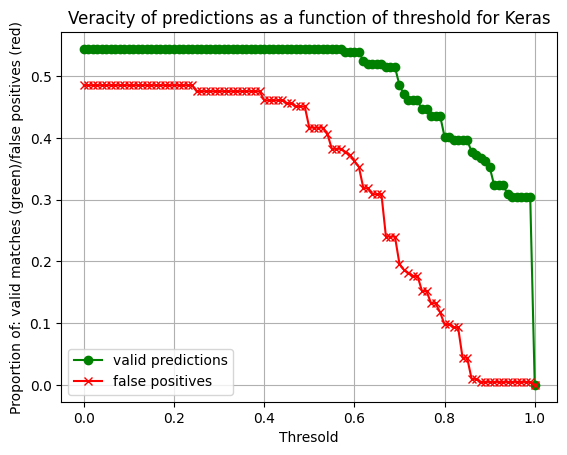

In [28]:
import matplotlib.pyplot as plt

#Lire le fichier et extraire les données
def lire_fichier(fichier):
    lignes = []
    with open(fichier, 'r', encoding='utf-8') as f:
        for ligne in f:
            fromages_score = ligne.strip().split()
            if len(fromages_score) == 3:
                fromage1, fromage2, score = fromages_score
                score = float(score)
                lignes.append((fromage1, fromage2, score))
    return lignes

#Calculer les correspondances valides pour chaque seuil
def calculer_correspondances(lignes_easy, lignes_keras):
    seuils = [i * 0.01 for i in range(101)]
    correspondances_easy = []
    correspondances_keras = []
    out = []

    for seuil in seuils:
        nb_correspondances_easy = sum(1 for fromage1, fromage2, score in lignes_keras if fromage1 == fromage2 and score > seuil)
        nb_correspondances_keras= sum(1 for fromage1, fromage2, score in lignes_keras if fromage1 != fromage2 and score > seuil)
        #nb_out = sum(1 for fromage1, fromage2, score in lignes if score <= seuil)
        correspondances_easy.append(nb_correspondances_easy /204)
        correspondances_keras.append(nb_correspondances_keras/204)
        #out.append(nb_out/204)

    return seuils, correspondances_easy, correspondances_keras

# Étape 3 : Tracer la courbe
def tracer_courbe(seuils, correspondances, correspondances_fausses):
    plt.plot(seuils, correspondances, marker='o', color='green', label='valid predictions')
    plt.plot(seuils, correspondances_fausses, marker='x', color="red", label="false positives")
    #plt.plot(seuils, out, marker='_', color="blue")
    plt.xlabel('Thresold')
    plt.ylabel('Proportion of: valid matches (green)/false positives (red)')
    plt.title('Veracity of predictions as a function of threshold for Keras')
    plt.legend()
    plt.grid(True)
    plt.show()

# Chemin du fichier
fichier1 = '/content/drive/MyDrive/modal/only_text/resultats_easyOCR.txt'
fichier2 = '/content/drive/MyDrive/modal/only_text/resultats_keras.txt'

# Lire le fichier et extraire les données
lignes1 = lire_fichier(fichier1)
lignes2 = lire_fichier(fichier2)
# Calculer les correspondances valides pour chaque seuil
seuils, correspondances, correspondances_fausses = calculer_correspondances(lignes1, lignes2)

# Tracer la courbe
tracer_courbe(seuils, correspondances, correspondances_fausses)